In [1]:
import os
import requests
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, SpectralClustering

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

import umap

In [2]:
pd.options.display.max_columns = 200

# Data Loading

In [3]:
salurbal_df = pd.read_excel( '../data/datos l1ux.xlsx' )

In [5]:
# Deleting columns
del salurbal_df[ 'SALID1' ]

In [6]:
salurbal_df.shape

(368, 19)

In [7]:
salurbal_df.dtypes

Country                  object
L1Name                   object
BECTUAREAL1UX           float64
BECNURBPTCHL1UX           int64
BECPTCHDENSL1UX         float64
BECAWMNSHPINDXL1UX      float64
BECAWMNNNGHL1UX         float64
BECEFFMESHSIZEL1UX      float64
BECAWAVGPTCHAREAL1UX    float64
BECAWEDGDENSL1UX        float64
BECPRSBRTL1UX             int64
BECPRSSUBWAYL1UX          int64
BECADCRCTYAVGL1UX       float64
BECADINTDENSL1UX        float64
BECADSTTDENSL1UX        float64
BECADSTTLGAVGL1UX       float64
BECADSTTPNODEAVGL1UX    float64
transporte                int64
urbano                    int64
dtype: object

In [8]:
salurbal_df.head()

,Country,L1Name,BECTUAREAL1UX,BECNURBPTCHL1UX,BECPTCHDENSL1UX,BECAWMNSHPINDXL1UX,BECAWMNNNGHL1UX,BECEFFMESHSIZEL1UX,BECAWAVGPTCHAREAL1UX,BECAWEDGDENSL1UX,BECPRSBRTL1UX,BECPRSSUBWAYL1UX,BECADCRCTYAVGL1UX,BECADINTDENSL1UX,BECADSTTDENSL1UX,BECADSTTLGAVGL1UX,BECADSTTPNODEAVGL1UX,transporte,urbano
0,Argentina,Bahia Blanca,5936.8518,198,1.9180,5.1609,61.0614,1612.1203,2803.2783,9.017143,0,0,1.013586,6.048771,1172.638429,109.389079,3.446932,6,4
1,Argentina,Mar del Plata,9243.5409,153,1.1238,6.8723,60.8413,5883.8861,8666.1085,13.663430,0,0,1.011338,7.587916,1457.473841,102.798618,3.606951,2,1
2,Argentina,San Nicolas de los Arroyos,2481.7488,48,1.1257,4.3717,60.5104,957.0535,1644.4314,14.801846,0,0,1.019215,5.926909,1131.306722,107.018352,3.269688,6,2
3,Argentina,Tandil,2258.1900,90,2.4748,4.4081,61.6375,1149.8336,1851.7128,19.720400,0,0,1.018717,6.067776,1254.268056,117.857092,3.434690,6,2
4,Argentina,Catamarca,4251.4200,108,1.5594,5.0310,61.3476,1478.1669,2408.0371,12.519576,0,0,1.021082,8.796352,1427.158541,92.539138,3.236150,2,4


# Cleaning Data

In [9]:
# Crea una columna contando la cantidad de valores faltantes
salurbal_df[ 'missings' ] = salurbal_df.isnull().sum( axis = 1 )

In [10]:
salurbal_df[ 'missings' ].value_counts( dropna = False )

0    368
Name: missings, dtype: int64

In [11]:
del salurbal_df[ 'missings' ]

In [12]:
features = salurbal_df.columns[ 2:-2 ].tolist()

In [13]:
ul_features = [ 'BECAWMNSHPINDXL1UX', 'BECEFFMESHSIZEL1UX', 'BECAWMNNNGHL1UX', 'BECAWEDGDENSL1UX', 'BECPTCHDENSL1UX', 'BECAWAVGPTCHAREAL1UX' ] # BECNURBPTCHL1UX

In [14]:
tr_features = [ 'BECPRSBRTL1UX', 'BECPRSSUBWAYL1UX', 'BECADSTTDENSL1UX', 'BECADSTTLGAVGL1UX', 'BECADINTDENSL1UX', 'BECADCRCTYAVGL1UX', 'BECADSTTPNODEAVGL1UX' ]

In [15]:
salurbal_df.head()

,Country,L1Name,BECTUAREAL1UX,BECNURBPTCHL1UX,BECPTCHDENSL1UX,BECAWMNSHPINDXL1UX,BECAWMNNNGHL1UX,BECEFFMESHSIZEL1UX,BECAWAVGPTCHAREAL1UX,BECAWEDGDENSL1UX,BECPRSBRTL1UX,BECPRSSUBWAYL1UX,BECADCRCTYAVGL1UX,BECADINTDENSL1UX,BECADSTTDENSL1UX,BECADSTTLGAVGL1UX,BECADSTTPNODEAVGL1UX,transporte,urbano
0,Argentina,Bahia Blanca,5936.8518,198,1.9180,5.1609,61.0614,1612.1203,2803.2783,9.017143,0,0,1.013586,6.048771,1172.638429,109.389079,3.446932,6,4
1,Argentina,Mar del Plata,9243.5409,153,1.1238,6.8723,60.8413,5883.8861,8666.1085,13.663430,0,0,1.011338,7.587916,1457.473841,102.798618,3.606951,2,1
2,Argentina,San Nicolas de los Arroyos,2481.7488,48,1.1257,4.3717,60.5104,957.0535,1644.4314,14.801846,0,0,1.019215,5.926909,1131.306722,107.018352,3.269688,6,2
3,Argentina,Tandil,2258.1900,90,2.4748,4.4081,61.6375,1149.8336,1851.7128,19.720400,0,0,1.018717,6.067776,1254.268056,117.857092,3.434690,6,2
4,Argentina,Catamarca,4251.4200,108,1.5594,5.0310,61.3476,1478.1669,2408.0371,12.519576,0,0,1.021082,8.796352,1427.158541,92.539138,3.236150,2,4


# Data Exploration

In [ ]:
#salurbal_df[ 'TR_PROFILE' ] = np.random.randint( 1, 6, size = salurbal_df.shape[ 0 ] )
#salurbal_df[ 'UL_PROFILE' ] = np.random.randint( 1, 6, size = salurbal_df.shape[ 0 ] )

In [16]:
salurbal_df.rename( columns = { 'transporte' : 'TR_PROFILE', 'urbano' : 'UL_PROFILE' }, inplace = True )

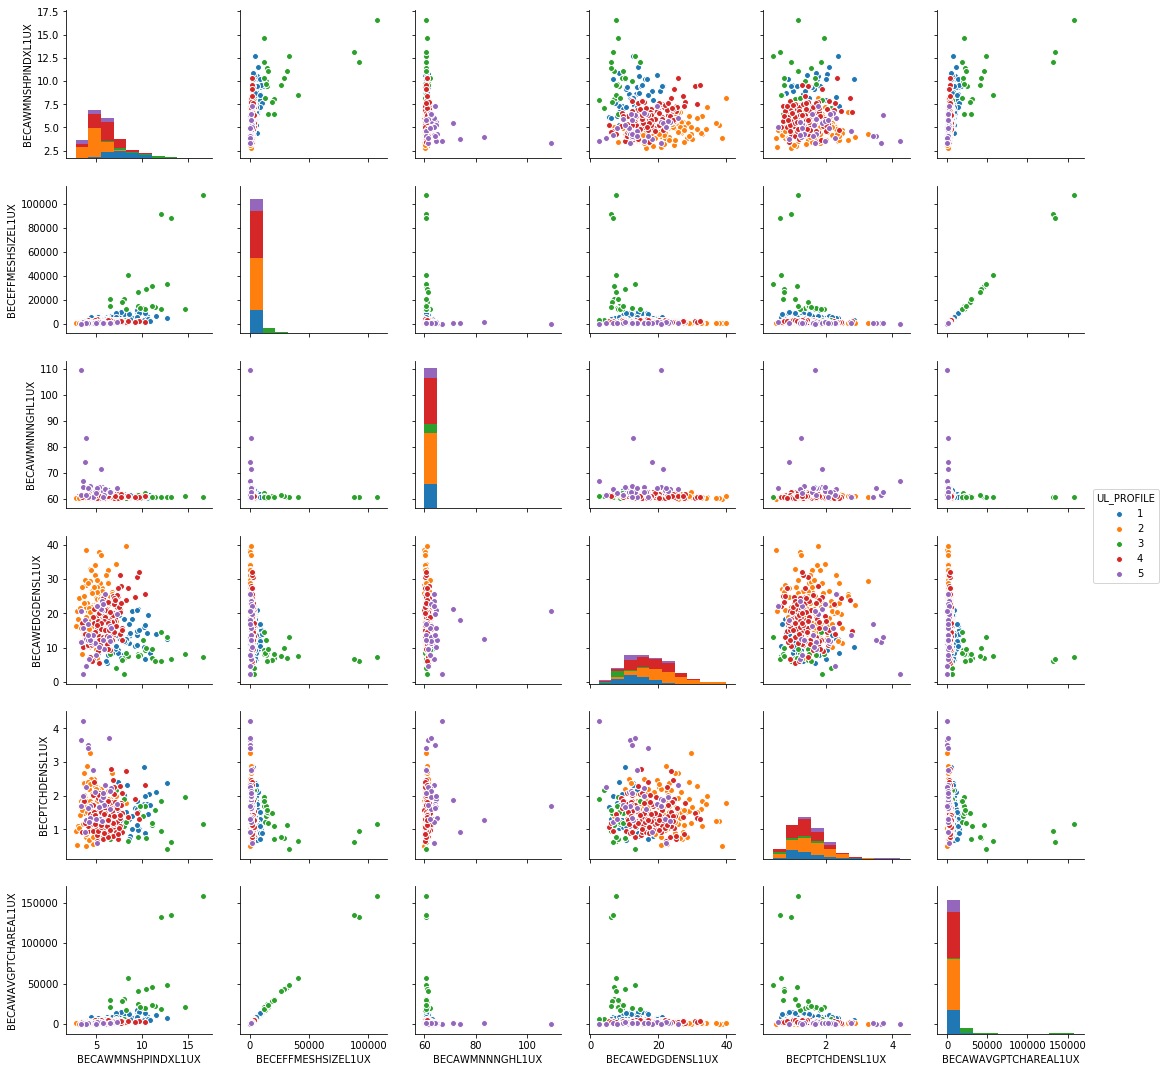

In [17]:
sns.pairplot( salurbal_df, vars = ul_features, hue = 'UL_PROFILE' )

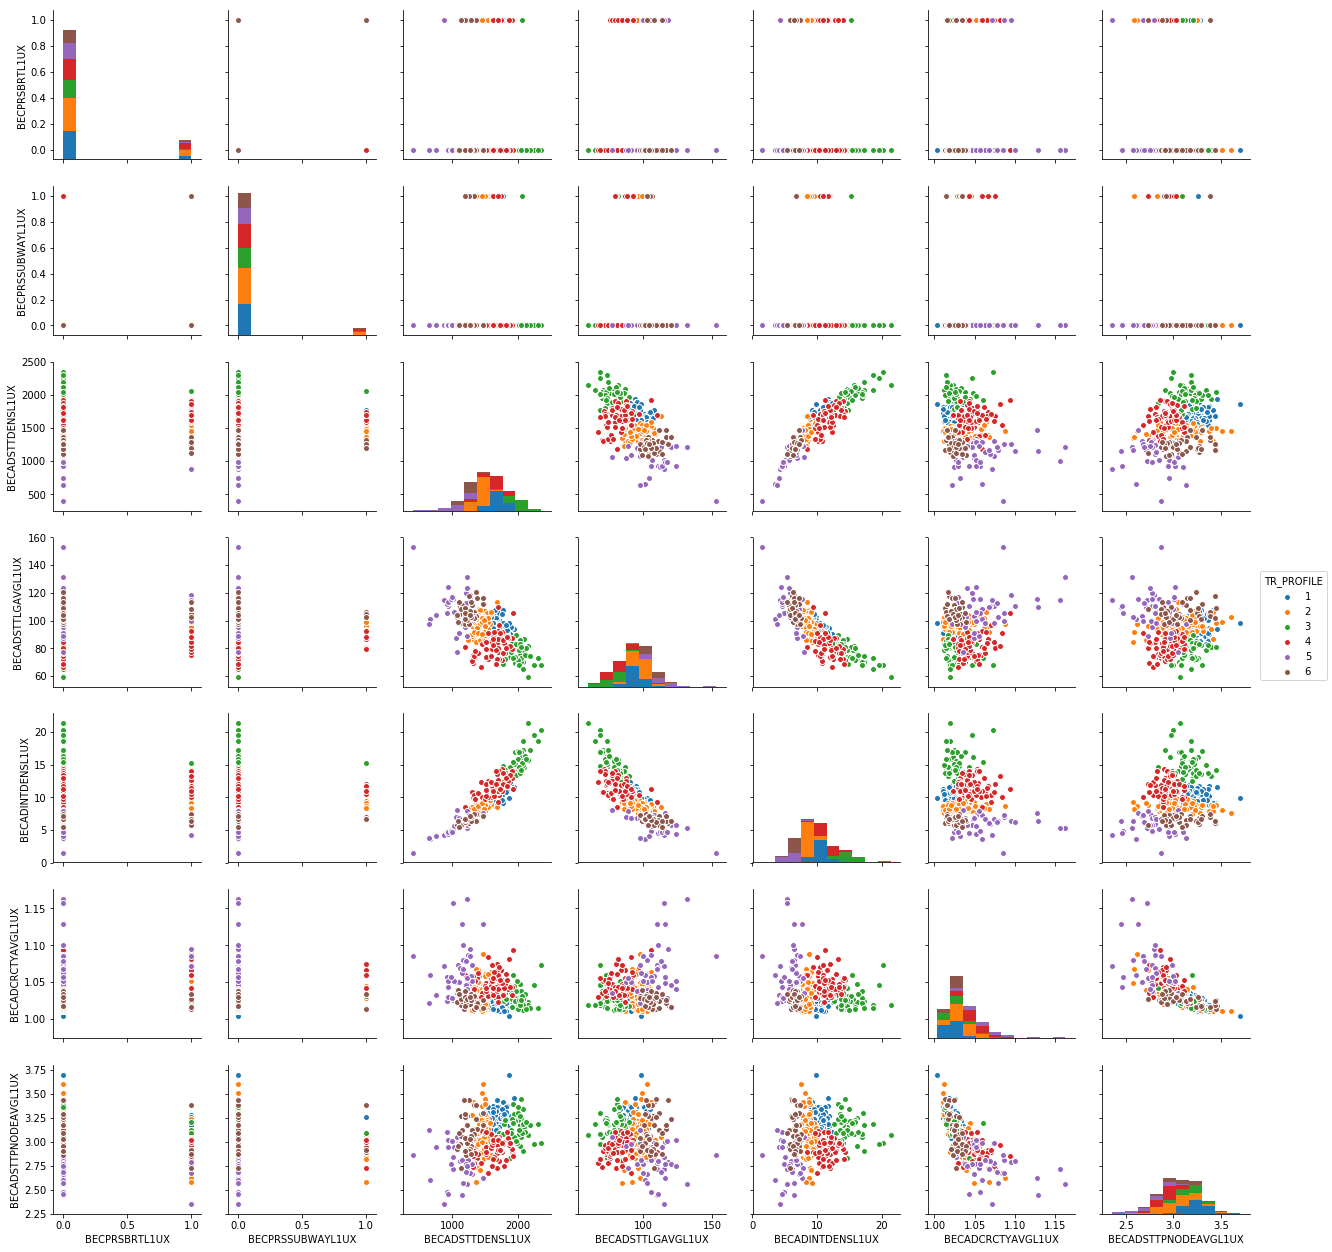

In [18]:
sns.pairplot( salurbal_df, vars = tr_features, hue = 'TR_PROFILE' )

# Geocoding

In [19]:
GOOGLE_API = os.environ[ 'GOOGLE_API' ]
URL = 'https://maps.googleapis.com/maps/api/geocode/json'

In [20]:
for index, row in salurbal_df.iterrows():
    #print( index )
    address = row[ 'L1Name' ] + ', ' + row[ 'Country' ]
    data = requests.get( URL, params = { 'key' : GOOGLE_API, 'address' : address } ).json()
    lat = data[ 'results' ][ 0 ][ 'geometry' ][ 'location' ][ 'lat' ]
    lng = data[ 'results' ][ 0 ][ 'geometry' ][ 'location' ][ 'lng' ]
    salurbal_df.loc[ index, 'latitude' ] = lat
    salurbal_df.loc[ index, 'longitude' ] = lng

In [21]:
salurbal_df.head()

,Country,L1Name,BECTUAREAL1UX,BECNURBPTCHL1UX,BECPTCHDENSL1UX,BECAWMNSHPINDXL1UX,BECAWMNNNGHL1UX,BECEFFMESHSIZEL1UX,BECAWAVGPTCHAREAL1UX,BECAWEDGDENSL1UX,BECPRSBRTL1UX,BECPRSSUBWAYL1UX,BECADCRCTYAVGL1UX,BECADINTDENSL1UX,BECADSTTDENSL1UX,BECADSTTLGAVGL1UX,BECADSTTPNODEAVGL1UX,TR_PROFILE,UL_PROFILE,latitude,longitude
0,Argentina,Bahia Blanca,5936.8518,198,1.9180,5.1609,61.0614,1612.1203,2803.2783,9.017143,0,0,1.013586,6.048771,1172.638429,109.389079,3.446932,6,4,-38.718318,-62.266348
1,Argentina,Mar del Plata,9243.5409,153,1.1238,6.8723,60.8413,5883.8861,8666.1085,13.663430,0,0,1.011338,7.587916,1457.473841,102.798618,3.606951,2,1,-38.005477,-57.542611
2,Argentina,San Nicolas de los Arroyos,2481.7488,48,1.1257,4.3717,60.5104,957.0535,1644.4314,14.801846,0,0,1.019215,5.926909,1131.306722,107.018352,3.269688,6,2,-33.333467,-60.211049
3,Argentina,Tandil,2258.1900,90,2.4748,4.4081,61.6375,1149.8336,1851.7128,19.720400,0,0,1.018717,6.067776,1254.268056,117.857092,3.434690,6,2,-37.328800,-59.136717
4,Argentina,Catamarca,4251.4200,108,1.5594,5.0310,61.3476,1478.1669,2408.0371,12.519576,0,0,1.021082,8.796352,1427.158541,92.539138,3.236150,2,4,-28.471588,-65.787721


In [22]:
salurbal_df[ 'latitude' ].isnull().sum()

0

# Complementary Clustering

### K-Means

kmeans_pipeline = Pipeline( [
    ( 'scaling', StandardScaler() ),
    ( 'clustering', KMeans( n_clusters = 5, n_jobs = -1, random_state = 1 ) )
] )

kmeans_mbe_salurbal = kmeans_pipeline.fit_predict( salurbal_df[ mbe_features ] )

for i in range( kmeans_mbe_salurbal.shape[ 0 ] ):
    kmeans_mbe_salurbal[ i ] = kmeans_mbe_salurbal[ i ] + 1

kmeans_mt_salurbal = kmeans_pipeline.fit_predict( salurbal_df[ mt_features ] )

for i in range( kmeans_mt_salurbal.shape[ 0 ] ):
    kmeans_mt_salurbal[ i ] = kmeans_mt_salurbal[ i ] + 1

salurbal_df[ 'MBE_CLUSTER_KMEANS' ] = kmeans_mbe_salurbal

salurbal_df[ 'MT_CLUSTER_KMEANS' ] = kmeans_mt_salurbal

salurbal_df[ 'MBE_CLUSTER_KMEANS' ].value_counts( dropna = False )

salurbal_df[ 'MT_CLUSTER_KMEANS' ].value_counts( dropna = False )

sns.pairplot( salurbal_df, vars = mbe_features, hue = 'MBE_CLUSTER_KMEANS' )

sns.pairplot( salurbal_df, vars = mt_features, hue = 'MT_CLUSTER_KMEANS' )

### Spectral Clustering

spectral_pipeline = Pipeline( [
    ( 'scaling', StandardScaler() ),
    ( 'clustering', SpectralClustering( n_clusters = 5, n_jobs = -1, random_state = 1 ) )
] )

spectral_mbe_salurbal = spectral_pipeline.fit_predict( salurbal_df[ mbe_features ] )

for i in range( spectral_mbe_salurbal.shape[ 0 ] ):
    spectral_mbe_salurbal[ i ] = spectral_mbe_salurbal[ i ] + 1

spectral_mt_salurbal = spectral_pipeline.fit_predict( salurbal_df[ mt_features ] )

for i in range( spectral_mt_salurbal.shape[ 0 ] ):
    spectral_mt_salurbal[ i ] = spectral_mt_salurbal[ i ] + 1

salurbal_df[ 'MBE_CLUSTER_SPECTRAL' ] = spectral_mbe_salurbal

salurbal_df[ 'MT_CLUSTER_SPECTRAL' ] = spectral_mt_salurbal

salurbal_df[ 'MBE_CLUSTER_SPECTRAL' ].value_counts( dropna = False )

salurbal_df[ 'MT_CLUSTER_SPECTRAL' ].value_counts( dropna = False )

sns.pairplot( salurbal_df, vars = mbe_features, hue = 'MBE_CLUSTER_SPECTRAL' )

sns.pairplot( salurbal_df, vars = mt_features, hue = 'MT_CLUSTER_SPECTRAL' )

# Dimensionality Reduction

### T-SNE

In [23]:
tsne_pipeline = Pipeline( [
    ( 'scaling', StandardScaler() ),
    ( 'dimred', TSNE( n_iter = 2000, random_state = 1 ) )
] )

In [24]:
tsne_ul_salurbal = tsne_pipeline.fit_transform( salurbal_df[ ul_features ] )

In [25]:
tsne_tr_salurbal = tsne_pipeline.fit_transform( salurbal_df[ tr_features ] )

In [26]:
salurbal_df[ 'TSNE_UL_X' ] = tsne_ul_salurbal[ :, 0 ]
salurbal_df[ 'TSNE_UL_Y' ] = tsne_ul_salurbal[ :, 1 ]

salurbal_df[ 'TSNE_TR_X' ] = tsne_tr_salurbal[ :, 0 ]
salurbal_df[ 'TSNE_TR_Y' ] = tsne_tr_salurbal[ :, 1 ]

### PCA

In [27]:
pca_pipeline = Pipeline( [
    ( 'scaling', StandardScaler() ),
    ( 'dimred', PCA( n_components = 2, random_state = 1 ) )
] )

In [28]:
pca_ul_salurbal = pca_pipeline.fit_transform( salurbal_df[ ul_features ] )
pca_pipeline.named_steps[ 'dimred' ].explained_variance_ratio_

array([0.44057128, 0.18461818])

In [29]:
pca_tr_salurbal = pca_pipeline.fit_transform( salurbal_df[ tr_features ] )
pca_pipeline.named_steps[ 'dimred' ].explained_variance_ratio_

array([0.41240701, 0.24662678])

In [30]:
salurbal_df[ 'PCA_UL_X' ] = pca_ul_salurbal[ :, 0 ]
salurbal_df[ 'PCA_UL_Y' ] = pca_ul_salurbal[ :, 1 ]

salurbal_df[ 'PCA_TR_X' ] = pca_tr_salurbal[ :, 0 ]
salurbal_df[ 'PCA_TR_Y' ] = pca_tr_salurbal[ :, 1 ]

### UMAP

In [31]:
umap_pipeline = Pipeline( [
    ( 'scaling', StandardScaler() ),
    ( 'dimred', umap.UMAP() )
] )

In [32]:
umap_ul_salurbal = umap_pipeline.fit_transform( salurbal_df[ ul_features ] )

C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [33]:
umap_tr_salurbal = umap_pipeline.fit_transform( salurbal_df[ tr_features ] )

C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
C:\Users\fc.pena\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)
  n_components


In [34]:
salurbal_df[ 'UMAP_UL_X' ] = umap_ul_salurbal[ :, 0 ]
salurbal_df[ 'UMAP_UL_Y' ] = umap_ul_salurbal[ :, 1 ]

salurbal_df[ 'UMAP_TR_X' ] = umap_tr_salurbal[ :, 0 ]
salurbal_df[ 'UMAP_TR_Y' ] = umap_tr_salurbal[ :, 1 ]

# Visualization

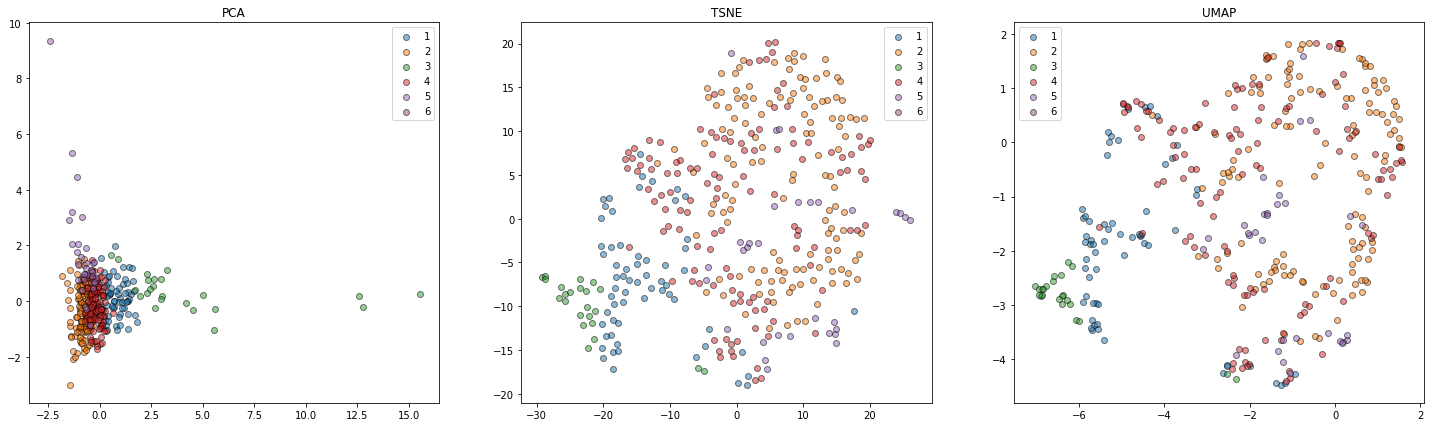

In [38]:
f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3,  figsize = ( 25, 7 ) )

model = 'UL'
clustering = ''
methods = { 'PCA' : ax1, 'TSNE' : ax2, 'UMAP' : ax3 }
for method in methods:
    for c in range( 1, 7 ):
        methods[ method ].scatter( salurbal_df.loc[ salurbal_df[ model + '_PROFILE' + clustering ] == c ][ method + '_' + model + '_X' ], salurbal_df.loc[ salurbal_df[ model + '_PROFILE' + clustering ] == c ][ method + '_' + model + '_Y' ], label = str( c ), edgecolor = 'black', alpha = 0.5 )
    methods[ method ].set_title( method )
    methods[ method ].legend()
plt.show()

f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3,  figsize = ( 25, 7 ) )

model = 'MBE'
clustering = '_KMEANS'
methods = { 'PCA' : ax1, 'TSNE' : ax2, 'UMAP' : ax3 }
for method in methods:
    for c in range( 1, 6 ):
        methods[ method ].scatter( salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_X' ], salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_Y' ], label = str( c ), edgecolor = 'black', alpha = 0.5 )
    methods[ method ].set_title( method )
    methods[ method ].legend()
plt.show()

f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3,  figsize = ( 25, 7 ) )

model = 'MBE'
clustering = '_SPECTRAL'
methods = { 'PCA' : ax1, 'TSNE' : ax2, 'UMAP' : ax3 }
for method in methods:
    for c in range( 1, 6 ):
        methods[ method ].scatter( salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_X' ], salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_Y' ], label = str( c ), edgecolor = 'black', alpha = 0.5 )
    methods[ method ].set_title( method )
    methods[ method ].legend()
plt.show()

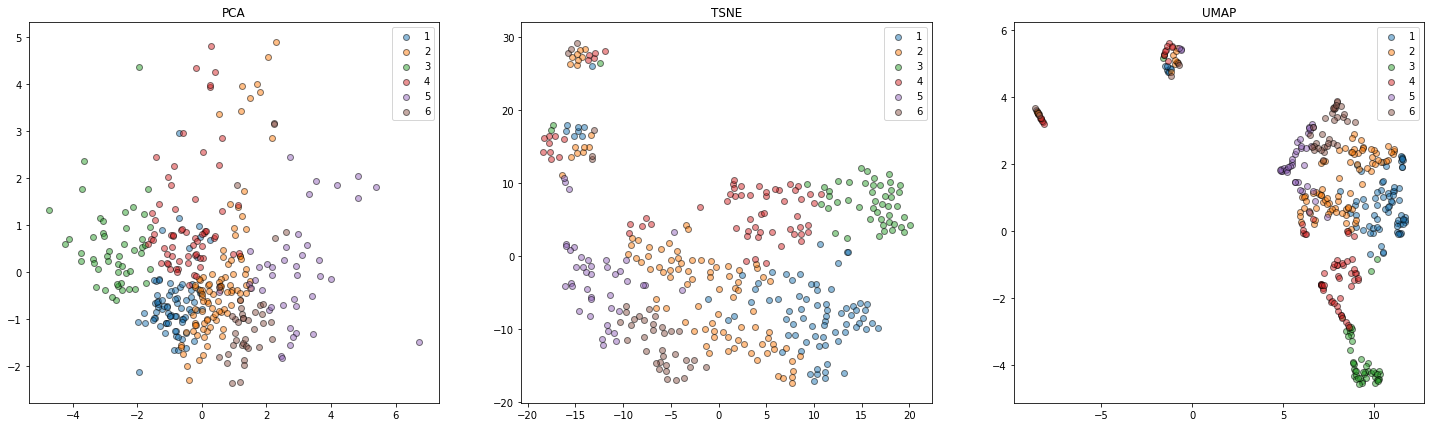

In [39]:
f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3,  figsize = ( 25, 7 ) )

model = 'TR'
clustering = ''
methods = { 'PCA' : ax1, 'TSNE' : ax2, 'UMAP' : ax3 }
for method in methods:
    for c in range( 1, 7 ):
        methods[ method ].scatter( salurbal_df.loc[ salurbal_df[ model + '_PROFILE' + clustering ] == c ][ method + '_' + model + '_X' ], salurbal_df.loc[ salurbal_df[ model + '_PROFILE' + clustering ] == c ][ method + '_' + model + '_Y' ], label = str( c ), edgecolor = 'black', alpha = 0.5 )
    methods[ method ].set_title( method )
    methods[ method ].legend()
plt.show()

f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3,  figsize = ( 25, 7 ) )

model = 'MT'
clustering = '_KMEANS'
methods = { 'PCA' : ax1, 'TSNE' : ax2, 'UMAP' : ax3 }
for method in methods:
    for c in range( 1, 6 ):
        methods[ method ].scatter( salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_X' ], salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_Y' ], label = str( c ), edgecolor = 'black', alpha = 0.5 )
    methods[ method ].set_title( method )
    methods[ method ].legend()
plt.show()

f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3,  figsize = ( 25, 7 ) )

model = 'MT'
clustering = '_SPECTRAL'
methods = { 'PCA' : ax1, 'TSNE' : ax2, 'UMAP' : ax3 }
for method in methods:
    for c in range( 1, 6 ):
        methods[ method ].scatter( salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_X' ], salurbal_df.loc[ salurbal_df[ model + '_CLUSTER' + clustering ] == c ][ method + '_' + model + '_Y' ], label = str( c ), edgecolor = 'black', alpha = 0.5 )
    methods[ method ].set_title( method )
    methods[ method ].legend()
plt.show()

In [37]:
salurbal_df.head()

,Country,L1Name,BECTUAREAL1UX,BECNURBPTCHL1UX,BECPTCHDENSL1UX,BECAWMNSHPINDXL1UX,BECAWMNNNGHL1UX,BECEFFMESHSIZEL1UX,BECAWAVGPTCHAREAL1UX,BECAWEDGDENSL1UX,BECPRSBRTL1UX,BECPRSSUBWAYL1UX,BECADCRCTYAVGL1UX,BECADINTDENSL1UX,BECADSTTDENSL1UX,BECADSTTLGAVGL1UX,BECADSTTPNODEAVGL1UX,TR_PROFILE,UL_PROFILE,latitude,longitude,TSNE_UL_X,TSNE_UL_Y,TSNE_TR_X,TSNE_TR_Y,PCA_UL_X,PCA_UL_Y,PCA_TR_X,PCA_TR_Y,UMAP_UL_X,UMAP_UL_Y,UMAP_TR_X,UMAP_TR_Y
0,Argentina,Bahia Blanca,5936.8518,198,1.9180,5.1609,61.0614,1612.1203,2803.2783,9.017143,0,0,1.013586,6.048771,1172.638429,109.389079,3.446932,6,4,-38.718318,-62.266348,2.816740,-12.513052,-4.458555,-16.957672,-0.243363,1.074047,0.931650,-2.351741,-1.650839,-3.646867,7.970022,3.854464
1,Argentina,Mar del Plata,9243.5409,153,1.1238,6.8723,60.8413,5883.8861,8666.1085,13.663430,0,0,1.011338,7.587916,1457.473841,102.798618,3.606951,2,1,-38.005477,-57.542611,-14.964062,-5.178152,7.666515,-17.320246,0.693908,-0.224658,-0.387615,-2.292826,-5.329547,-1.599490,11.051018,2.388360
2,Argentina,San Nicolas de los Arroyos,2481.7488,48,1.1257,4.3717,60.5104,957.0535,1644.4314,14.801846,0,0,1.019215,5.926909,1131.306722,107.018352,3.269688,6,2,-33.333467,-60.211049,-1.989547,0.795842,-6.269808,-15.497581,-0.498850,-0.358268,1.303139,-1.876793,-2.633455,-0.558789,7.776359,3.722876
3,Argentina,Tandil,2258.1900,90,2.4748,4.4081,61.6375,1149.8336,1851.7128,19.720400,0,0,1.018717,6.067776,1254.268056,117.857092,3.434690,6,2,-37.328800,-59.136717,14.229306,-7.321771,-3.600349,-16.678673,-1.068947,0.980155,1.190518,-2.346796,0.405664,-2.816247,8.153572,3.747052
4,Argentina,Catamarca,4251.4200,108,1.5594,5.0310,61.3476,1478.1669,2408.0371,12.519576,0,0,1.021082,8.796352,1427.158541,92.539138,3.236150,2,4,-28.471588,-65.787721,0.425493,-8.624958,5.183514,-11.156785,-0.339607,0.459561,-0.199854,-1.080344,-2.376652,-2.502136,9.871432,2.035020


In [40]:
salurbal_df.to_csv( '../data/modelos_l1.csv', sep = ';', decimal = ',', index = False )

# Explanations

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [ ]:
iris = sklearn.datasets.load_iris()

In [ ]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(iris.data, iris.target, train_size=0.80)

In [ ]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train, labels_train)

In [ ]:
sklearn.metrics.accuracy_score(labels_test, rf.predict(test))

In [ ]:
iris.target_names

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=iris.feature_names, class_names=iris.target_names, discretize_continuous=True)

In [ ]:
i = np.random.randint(0, test.shape[0])
exp = explainer.explain_instance(test[i], rf.predict_proba, num_features=2, top_labels=1)

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
test.shape

In [ ]:
#salurbal_df[ [ 'MT_PROB1', 'MT_PROB2', 'MT_PROB3', 'MT_PROB4', 'MT_PROB5' ] ].sum( axis = 1 )

In [ ]:
salurbal_df[ mt_features ].dtypes

In [ ]:
salurbal_mx = salurbal_df[ mt_features ].values
salurbal_mx.shape

In [ ]:
salurbal_mx_probs = lambda x: salurbal_df[ [ 'MT_PROB1', 'MT_PROB2', 'MT_PROB3', 'MT_PROB4', 'MT_PROB5' ] ].values
salurbal_mx_probs

In [ ]:
salurbal_mx_probs( 1 )

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer( salurbal_mx, feature_names = mt_features, class_names = [ '1' , '2', '3', '4', '5' ] )

In [ ]:
i = np.random.randint( 0, salurbal_mx.shape[ 0 ] )
i

In [ ]:
exp = explainer.explain_instance( salurbal_mx[ i ], salurbal_mx_probs, num_features = 7 )